# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X[:5])

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]


In [4]:
print(y[:5])

[192261.83 191792.06 191050.39 182901.99 166187.94]


## Encoding categorical data

If all dummy variables are included in the model, then a variable is being duplicated. This is called the dummy variable trap. If there are m dummy variables, then the last dummy variable can be dropped. This is because the information of the last dummy variable is already captured by the m-1 dummy variables. This phenomen is called multicolinearity, in which one independent variable can be predicted from the others with a substantial degree of accuracy.

IMPORTANT: The linear regression class from scikit-learn takes care of the dummy variable trap automatically, so we don't need to worry about it. 😉

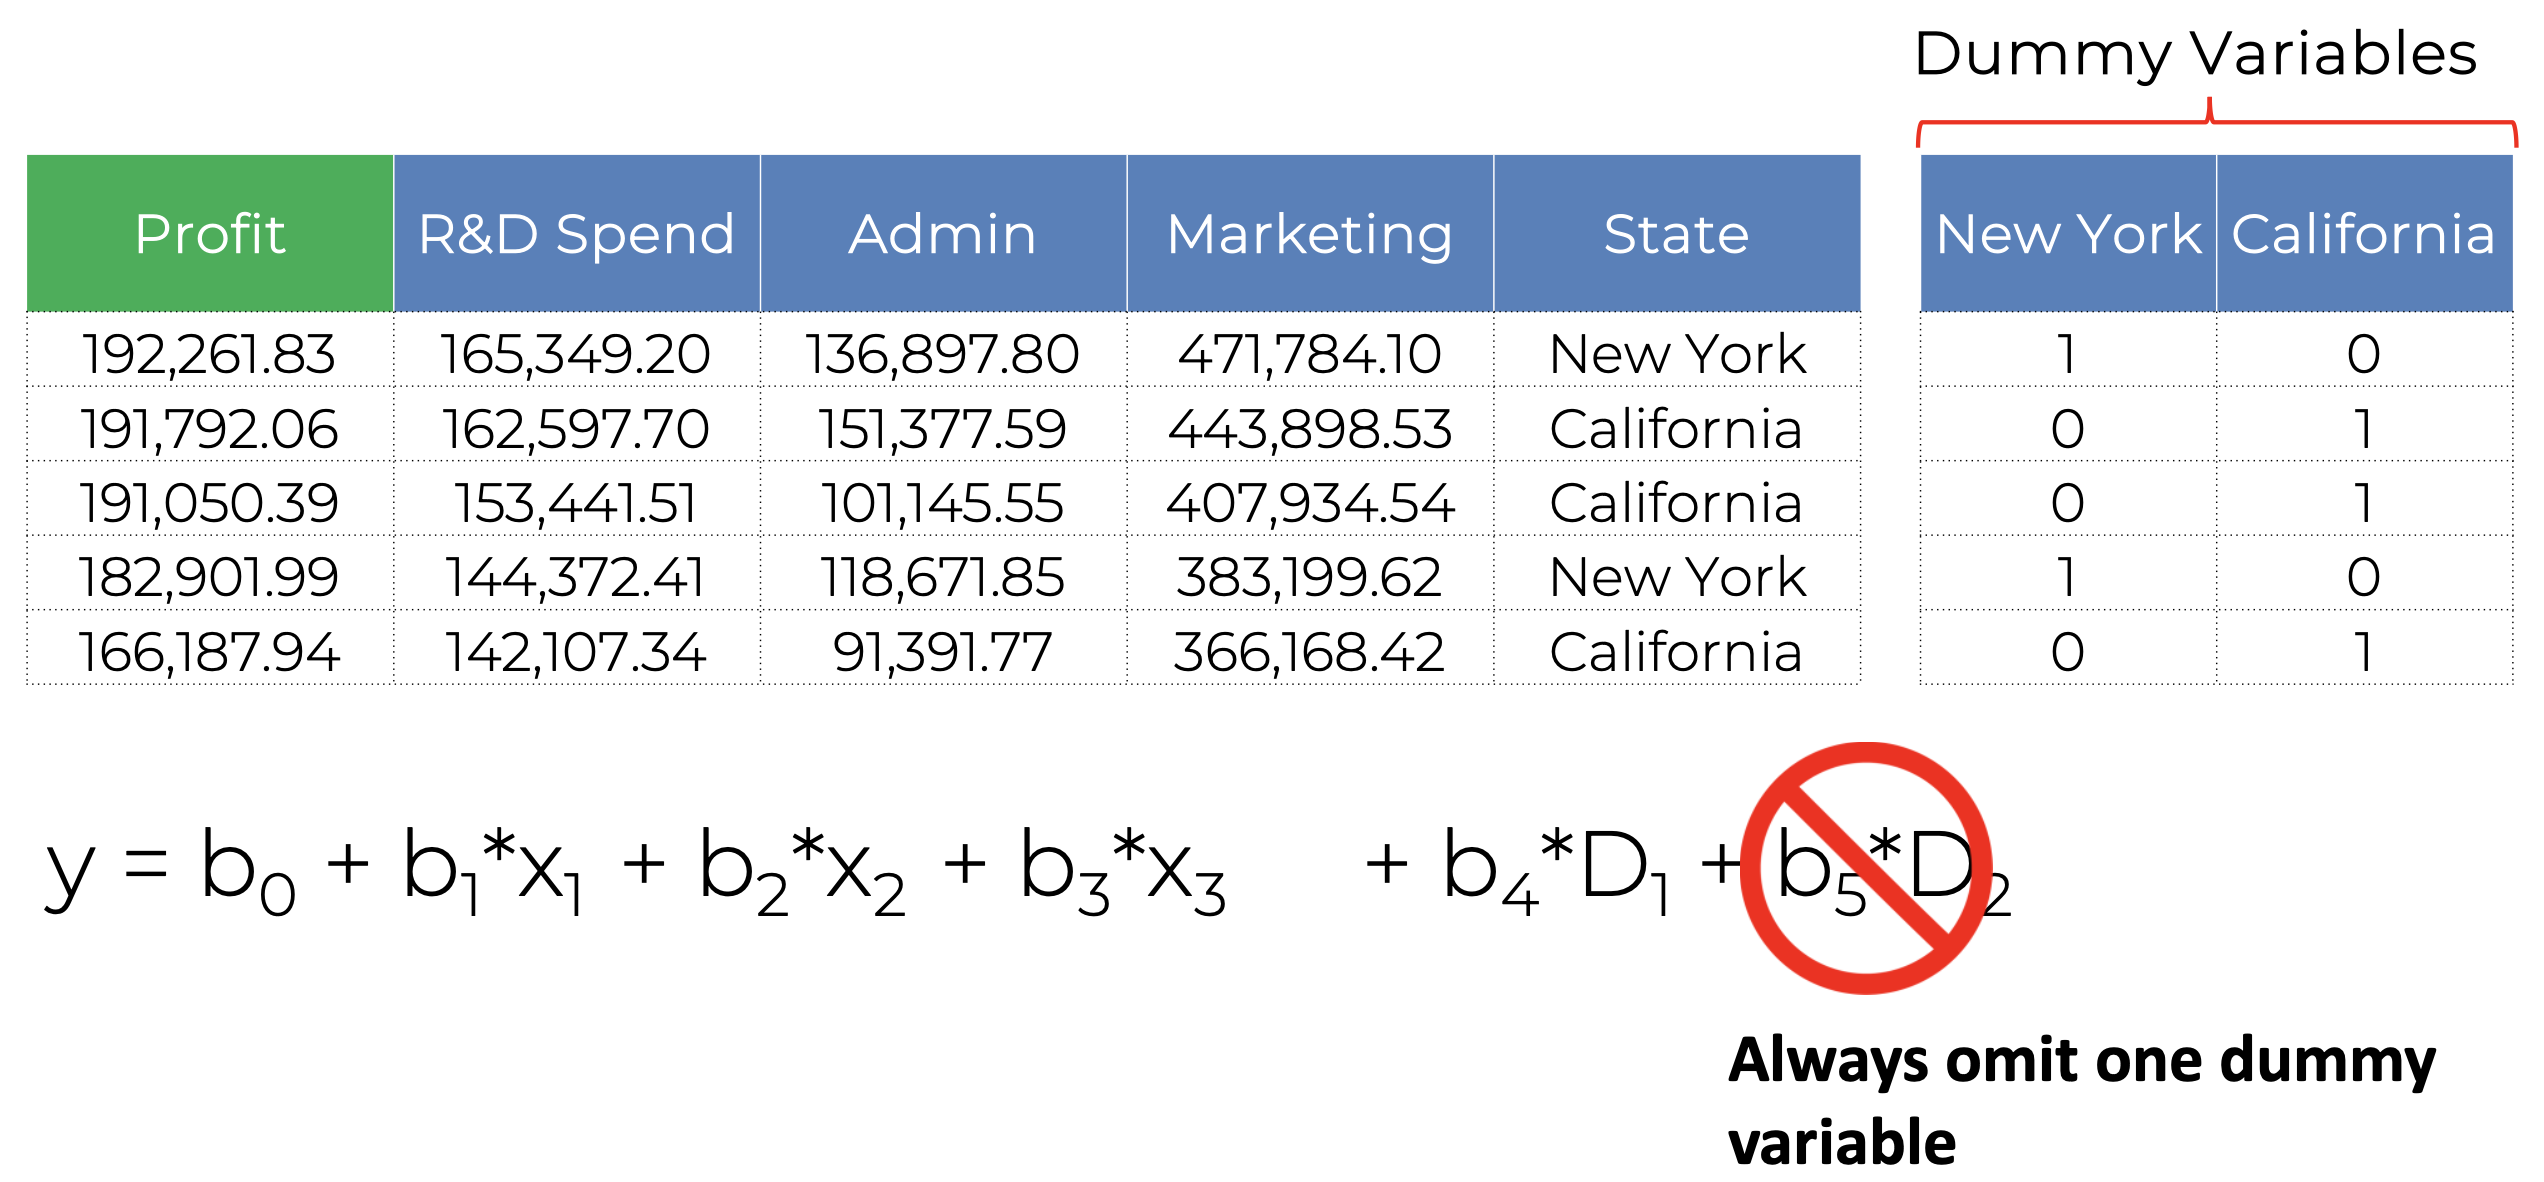

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [6]:
print(X[:5])

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

Assumptions of a Linear Regression:

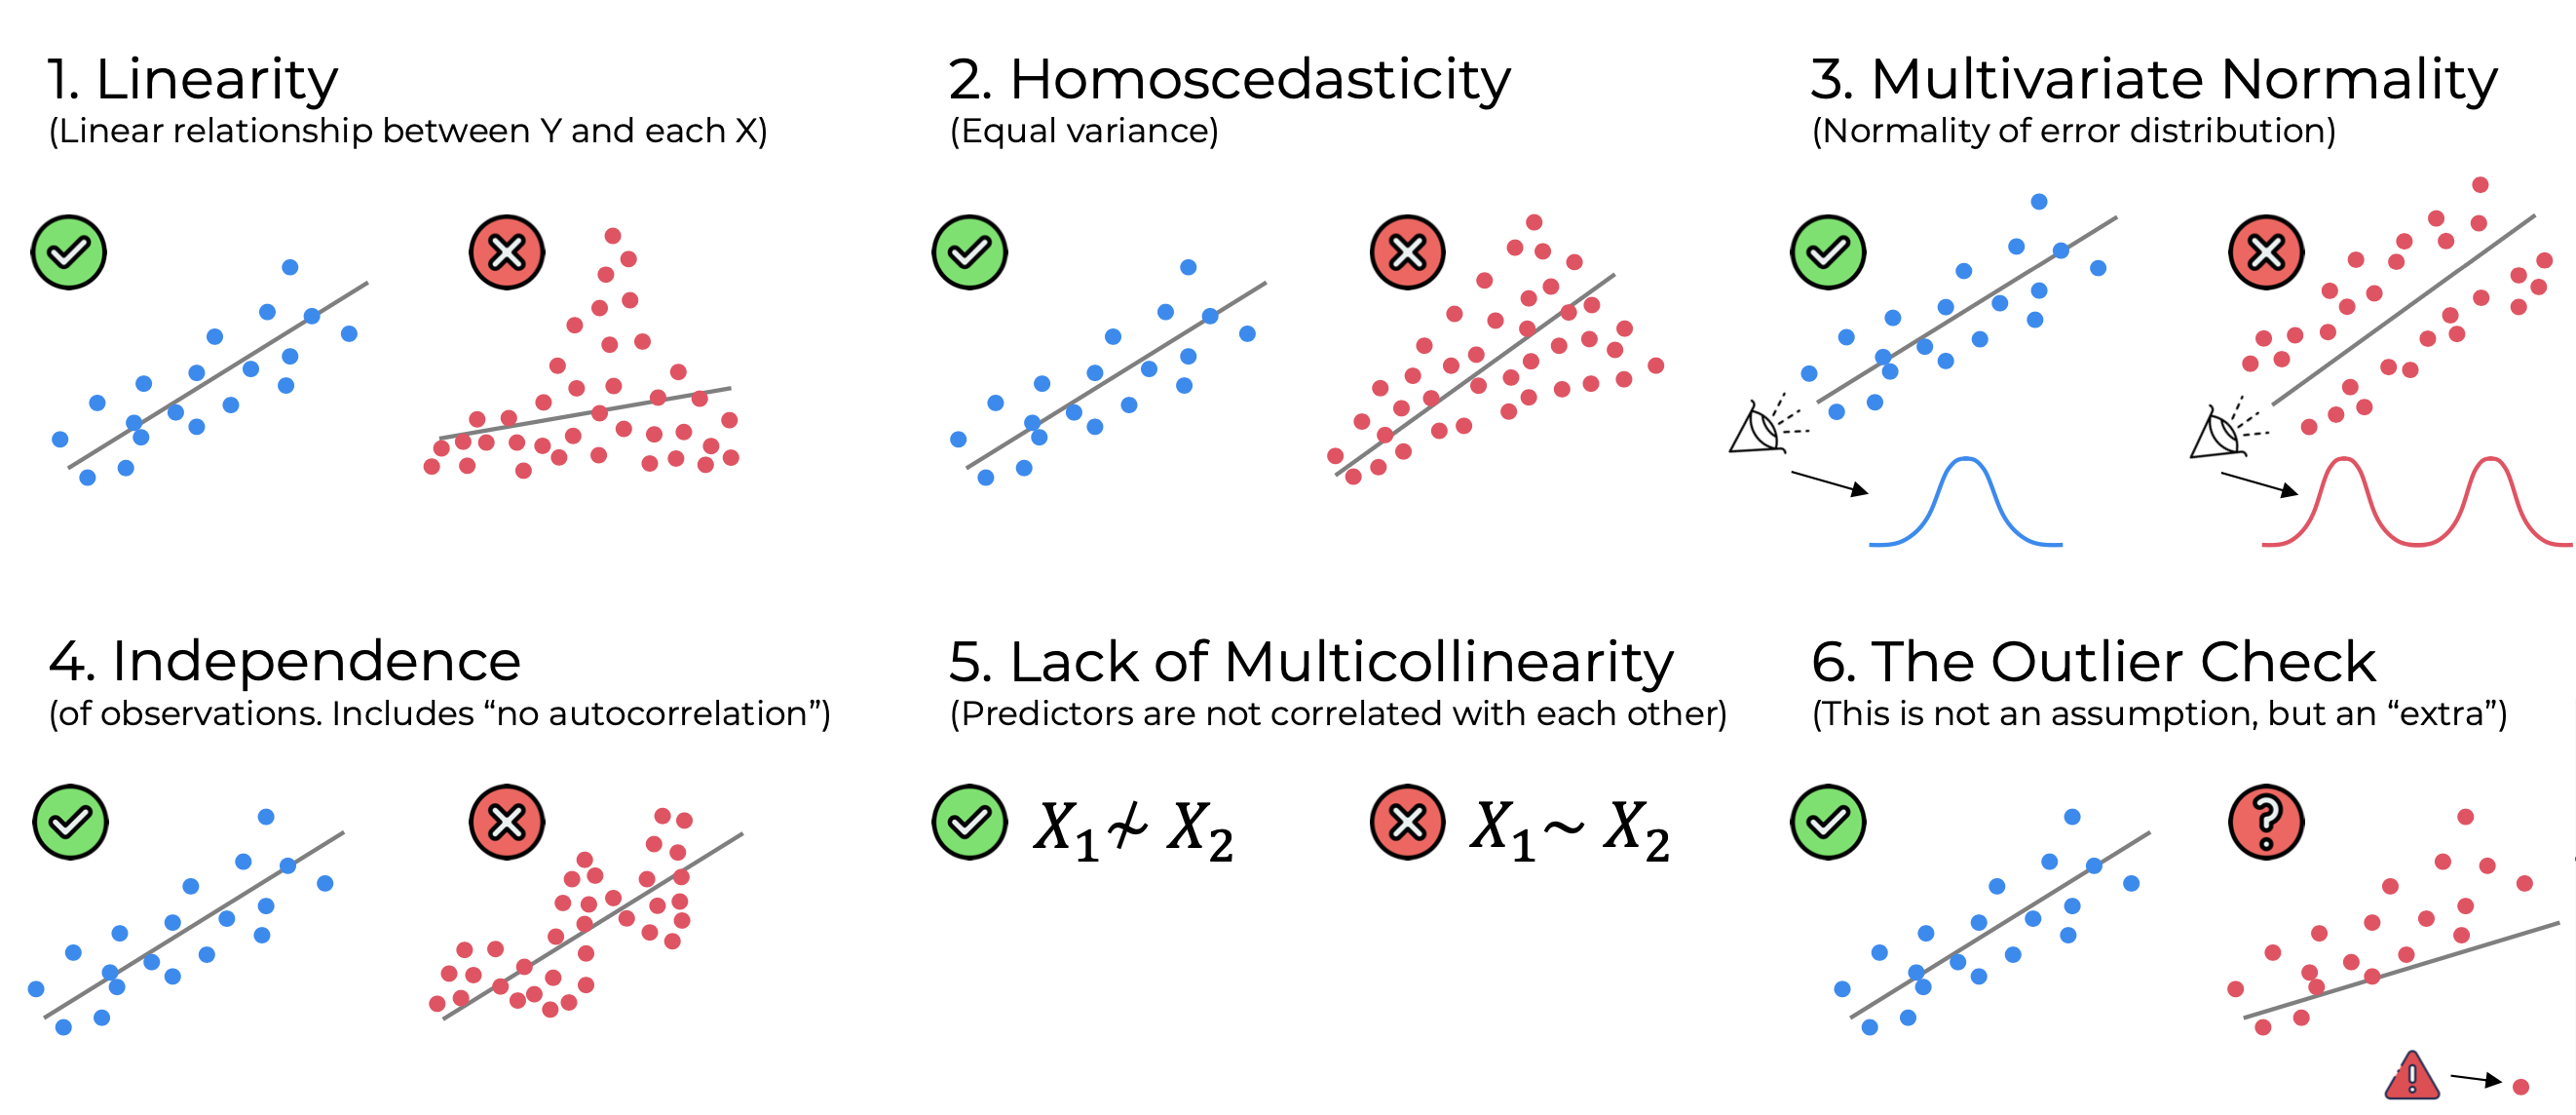

Do we need to check the assumptions of a linear regression model? The answer is no. The assumptions are for the parameters of the model, not the model itself. If the parameters do not have linear relationships, the model will perform poorly and will have low accuracy.

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

IMPORTANT: The linear regression class from scikit-learn takes care of feature selection (highest p-values) automatically, so we don't need to worry about it. 😉

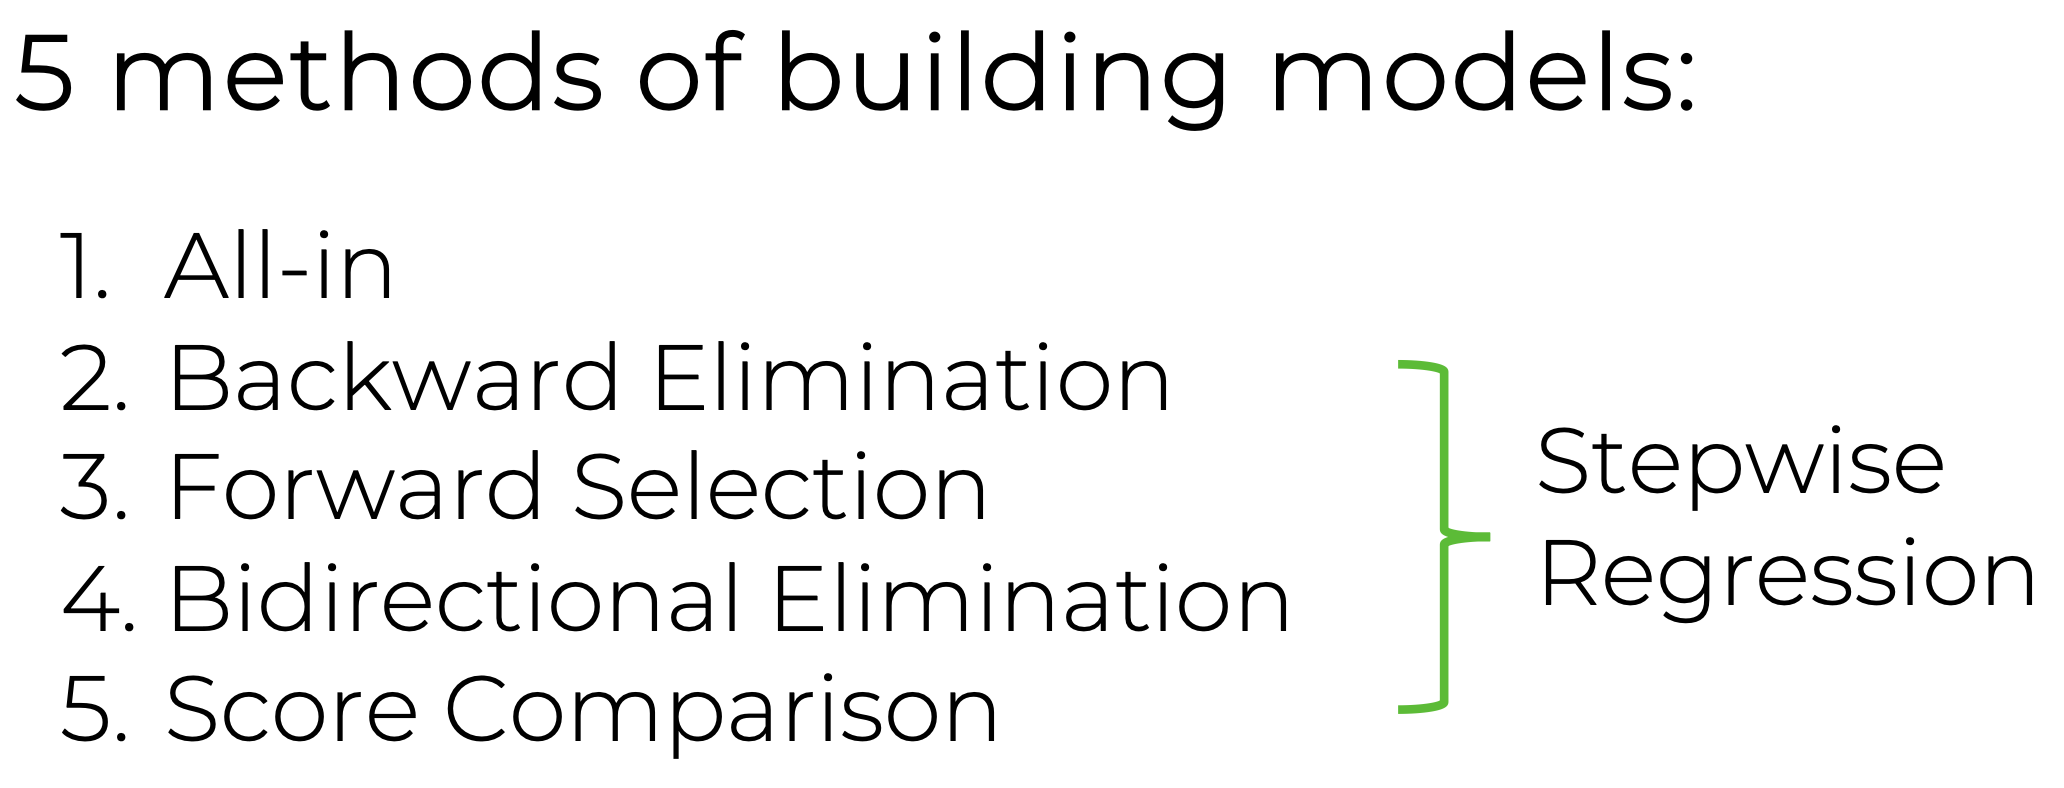

In [11]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis=1)

array([[103015.2 , 103282.38],
       [132582.28, 144259.4 ],
       [132447.74, 146121.95],
       [ 71976.1 ,  77798.83],
       [178537.48, 191050.39],
       [116161.24, 105008.31],
       [ 67851.69,  81229.06],
       [ 98791.73,  97483.56],
       [113969.44, 110352.25],
       [167921.07, 166187.94]])

## Making a single prediction

In [12]:
# R&D Spend = 160000
# Administration Spend = 130000
#  Marketing Spend = 300000
#  State = 'California'
regressor.predict([[1, 0, 0, 160000, 130000, 300000]])

array([181566.92])

Therefore, the model predicts that the profit of a Californian startup which spent 160000 in R&D, 130000 in Administration and 300000 in Marketing is $ 181566,92.

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$1, 0, 0, 160000, 130000, 300000 \rightarrow \textrm{scalars}$

$[1, 0, 0, 160000, 130000, 300000] \rightarrow \textrm{1D array}$

$[[1, 0, 0, 160000, 130000, 300000]] \rightarrow \textrm{2D array}$

**Important note 2:** Notice also that the "California" state was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the second row of the matrix of features X, "California" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, not the last three ones, because the dummy variables are always created in the first columns.

## Getting the final linear regression equation with the values of the coefficients

In [14]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.529248548686


Therefore, the equation of our multiple linear regression model is:

$$\textrm{Profit} = 86.6 \times \textrm{Dummy State 1} - 873 \times \textrm{Dummy State 2} + 786 \times \textrm{Dummy State 3} + 0.773 \times \textrm{R-D Spend} + 0.0329 \times \textrm{Administration} + 0.0366 \times \textrm{Marketing Spend} + 42467.53$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.